# SCC-ICMC-USP - 1o. semestre de 2021
# SCC0275 - Exercício 3

### Profa. Roseli A. F. Romero

### Monitor: Kenzo Sakiyama

Alunos:

...


## Dados unidimensionais
 
Suponha dois conjuntos de dados, que representam as notas finais em uma dada disciplina de duas salas com 100 alunos. Os dados foram armazenados nos arquivos "notas_salas01.txt" e "notas_salas02.txt". 

Imagine que uma pessoa deseje comparar o desempenho das salas de aula. Considera-se que, **quanto mais alunos foram aprovados, melhor o desempenho da sala**. Suponha que para ser aprovado, um aluno deve ter nota maior que 50. 

Como medida inicial de desempenho, essa pessoa calculou a média dos dados através do código abaixo:

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
salas = []
salas.append(np.loadtxt("notas_sala01.txt"))
salas.append(np.loadtxt("notas_sala02.txt"))

for i in range(0,2):
    print("--- Sala: %d ---" % (i+1))
    print("Média: %f" % np.mean(salas[i]))        

--- Sala: 1 ---
Média: 60.184709
--- Sala: 2 ---
Média: 55.184195


Com base na média, a pessoa concluiu que a sala 1 obteve um melhor desempenho que a sala 2. 

### Questão 01. 
Demonstre o porquê dessa conclusão estar equivocada.
   - Sugestão: Transforme as estruturas `salas[0]` e `salas[1]` em estruturas do tipo `DataFrame` da biblioteca **pandas** e utilize as funções de histograma e/ou boxplot.

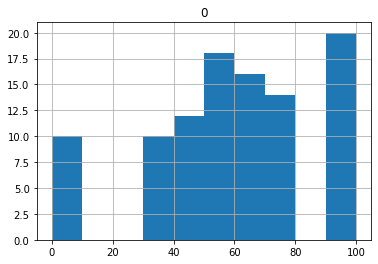

In [3]:
df1 = pd.DataFrame(salas[0])
df2 = pd.DataFrame(salas[1])

h = df1.hist()

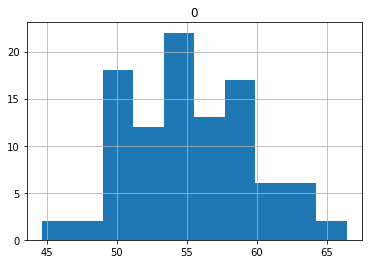

In [4]:
h2 = df2.hist()

Analisando os histogramas nota-se que no caso da sala 2 houve muito mais alunos com nota acima de 50. Portanto, embora a média da sala 1 seja maior devido a alguns casos de nota muito altas, na sala 2 mais alunos tiraram acima de 50 e como consequencia a sala 2 obteve um melhor desempenho.

### Questão 02.
Calcule o número de aprovados em cada uma das salas.

In [5]:
def num_alunos_aprovados(notas, media=50):
    print("Número de aprovados na sala: %d" % len(np.argwhere(notas > 50)))

num_alunos_aprovados(salas[1])

Número de aprovados na sala: 90


### Base Futebol

Suponha que uma emissora de televisão te contratou para analisar o perfil dos jogadores do futebol europeu para que os narradores possam dizer estatísticas sobre eles durante os jogos.

Os dados estão numa planilha chamada `players_sampled.csv`, onde cada linha contém os dados de um jogador e cada coluna possui um atributo. Essa base foi adaptada do site de competições de ciência de dados chamado [Kaggle](*https*://www.kaggle.com/hugomathien/soccer).

In [6]:
# Carregando a base
df = pd.read_csv('players_sampled.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  350 non-null    int64  
 1   player_api_id       350 non-null    int64  
 2   player_name         350 non-null    object 
 3   player_fifa_api_id  350 non-null    int64  
 4   birthday            350 non-null    object 
 5   height              350 non-null    float64
 6   weight              350 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 19.3+ KB


### Questão 03
Para cada atributo da base, identifique quais são categoricos/nominais, ordinais, intervalares e racionais. (Não precisa ser em código)


Resposta:

**Nominal/Categorico:** id, player_api_id, player_fifa_api_id, player_name

**Intervalar**: birthday

**Racional:** height, weight

### Questão 4

Formule 3 hipóteses sobre a base ou seus atributos que possam ser verificadas com os conceitos apresentados na disciplina.

Ex: O atributo altura tem mais valores abaixo da média (obliquidade negativa)


-   Hipótese 1: Há mais jogadores com alturas acima da média (obliquidade negativa). 

-   Hipótese 2: Há mais jogadores com peso acima da média (obliquidade negativa)

-   Hipótese 3: As alturas dos jogadores apresentam uma distribuição mais achatada que a distribuição normal (curtose negativa). 




### Questão 5 Verifique se suas hipóteses são verdadeiras

### Hipótese 1

Analisando os valores de média, moda, mediana e obliquidade chegamos a conclusão que a hipótese é verdadeira, pois os valores de moda e mediana estão a direita do valor da média e sua obliquidade é negativa.

In [7]:
def h1(df):

    sample_values = df["height"].values

    df["height"].hist()
    print(f"- O valor da sua média é {sample_values.mean()}")
    print(f"- O valor da sua moda é {stats.mode(sample_values)}")
    print(f"- O valor da sua mediana é {np.median(sample_values)}")
    print(f"- O valor da sua obliquidade é {stats.skew(sample_values)}")

- O valor da sua média é 182.0164
- O valor da sua moda é ModeResult(mode=array([182.88]), count=array([69]))
- O valor da sua mediana é 182.88
- O valor da sua obliquidade é -0.1195645747184587


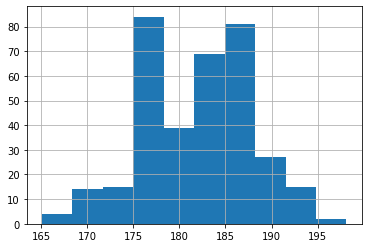

In [8]:
h1(df)

### Hipotese 2

Analisando os valores de média, moda, mediana e obliquidade conclui-se que a hipótese é falsa. O que ocorre é o contrário, predominam jogadores com peso abaixo da média, já que os valores de moda e mediana são menores que o valor da média e sua obliquidade é positiva.

In [9]:
def h2(df):

    sample_values = df["weight"].values

    df["weight"].hist()
    print(f"- O valor da sua média é {sample_values.mean()}")
    print(f"- O valor da sua moda é {stats.mode(sample_values)}")
    print(f"- O valor da sua mediana é {np.median(sample_values)}")
    print(f"- O valor da sua obliquidade é {stats.skew(sample_values)}")

- O valor da sua média é 168.55428571428573
- O valor da sua moda é ModeResult(mode=array([176]), count=array([29]))
- O valor da sua mediana é 168.0
- O valor da sua obliquidade é 0.030147052872861315


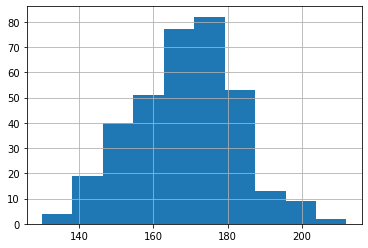

In [10]:
h2(df)

## Hipótese 3

Observa-se pela análise do histograma dos valores de altura e do valor da kurtose que a hipótese é verdadeira. Observa-se que o valor da kurtose é negativo o que justifica a aparência achatada da distribuição.

In [11]:
def h3(df):

    sample_values = df["height"].values

    df["height"].hist()
    print(f"- O valor da kurtose é {stats.kurtosis(sample_values)}")

- O valor da kurtose é -0.44312347846415756


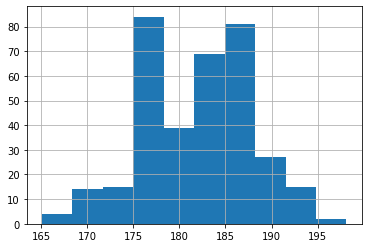

In [12]:
h3(df)

### Questão 6
- Os pesos dos jogadores foram dados em libras. Transforme os pesos dos jogadores para quilos e substitua o valor antigo da coluna no DataFrame. Dica: 1 lb = 0.45359237 kg

- Crie um novo atributo chamado "age" (idade) a partir da data de nascimento do jogador. Este atributo deve ser considerado nas próximas questões. A idade deve ser um número inteiro.

In [13]:
def lb_para_kg(df):
    df['weight'] = df['weight'].map(lambda x: x*0.45359237)
    return df

df = lb_para_kg(df)
df['weight']

0      79.832257
1      68.038855
2      81.193034
3      69.853225
4      72.121187
         ...    
345    68.038855
346    69.853225
347    84.821773
348    74.842741
349    83.914588
Name: weight, Length: 350, dtype: float64

In [14]:
# A biblioteca calendar ou a datetime podem te ajudar
# Essa questão poderia ser feita de outras formas, como por exemplo utilizando a biblioteca datetime
import time
import calendar

def calc_idade(df):
  # strptime -> transforma a data no formato especificado pela string em struct_time (https://docs.python.org/3/library/time.html#time.struct_time)
  # calendar.timegm -> recebe uma struct_time e transforma em unix timestamp
  # time.time() nos da o tempo atual em unix timestamp. A diferença desse valor e da nossa data é quantos segundos de vida o jogador tem
  # Dividimos o valor por 3.154e+7 para ter o resultado em anos.
  # Era mais fácil resolver usando o pandas diretamente
    age_calc = lambda x: (time.time() - calendar.timegm(time.strptime(x, '%Y-%m-%d %H:%M:%S'))) / 3.154e+7
    df['age'] = df['birthday'].map(age_calc).astype(int)
    return df
calc_idade(df)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,age
0,530,167285,Alireza Haghighi,191589,1988-05-02 00:00:00,193.04,79.832257,33
1,8608,184536,Philippe Coutinho,189242,1992-06-12 00:00:00,170.18,68.038855,29
2,7752,38947,Mustapha Jarju Alasan,178374,1986-07-18 00:00:00,182.88,81.193034,35
3,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,69.853225,42
4,8427,27613,Paulinho,164256,1986-01-10 00:00:00,175.26,72.121187,35
...,...,...,...,...,...,...,...,...
345,10199,7627,Thierno Bah,45269,1982-10-05 00:00:00,175.26,68.038855,39
346,1216,246330,Benjamin Morel,202753,1987-06-10 00:00:00,180.34,69.853225,34
347,4262,33793,Hugo Alcantara,14491,1979-07-28 00:00:00,190.50,84.821773,42
348,5886,173699,Koro Kone,207538,1989-07-05 00:00:00,177.80,74.842741,32


### Questão 7
Implemente a função que calcule o percetil de determinado atributo. (Atenção: As bibliotecas Numpy/Pandas possuem a função *quantile* você não deve usá-la em sua função). Os resultados também podem variar dependendo da implementação. Tente seguir a definição dos slides. 

In [15]:
def percentile(df, nome_attr, pct):
    col = df[nome_attr].sort_values()
    idx = np.ceil(pct*len(col) + 0.5)
    return col.iloc[int(idx)]

### Questão 08
Utilizando sua função, calcule a mediana, 1º quartil, 3º quartil

In [16]:
print(percentile(df, 'weight', 0.25))
print(percentile(df, 'weight', 0.50))
print(percentile(df, 'weight', 0.75))

# Comparando com numpy
print(np.quantile(df['weight'], 0.25))
print(np.quantile(df['weight'], 0.50))
print(np.quantile(df['weight'], 0.75))

72.12118683
76.20351816
81.19303423000001
72.12118683
76.20351816
81.19303423000001


# Questão 09

Calcule os quatro momentos (média, variância, obliquidade e achatamento) dos atributos onde essas métricas fazem sentido.

  - Dica: Utilize as bibliotecas **numpy** para média (mean) e variância (variance) e **Scipy.stats** para obliquidade (skew) e achatamento (kurtosis).

In [17]:
def quatro_momentos(df, nome_attr):
    print("--- Variável: {} ---".format(nome_attr))
    print("Média: %f" % np.mean(df[nome_attr]))
    print("Variância: %f" % np.var(df[nome_attr]))
    print("Obliquidade: %f" % stats.skew(df[nome_attr]))
    print("Achatamento: %f" % stats.kurtosis(df[nome_attr]))

In [18]:
quatro_momentos(df, 'weight')
# Mesma coisa para height e age

--- Variável: weight ---
Média: 76.454938
Variância: 41.163591
Obliquidade: 0.030147
Achatamento: -0.124213


### Questão 10

- Calcule o histograma e o boxplot dos atributos altura, peso e idade.
- A distribuição dos atributos possui curvatura para algum lado ou são centrados?
- A partir do Boxplot, verifique se os atributos tem outliers e justifique.

In [19]:
def hist(df, nome_attr):
    df.hist(nome_attr, density=1)
    df[nome_attr].plot.kde()

def boxplot(df, nome_attr):
    df.boxplot(nome_attr, showmeans=True)

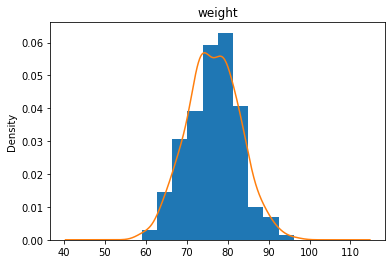

In [20]:
hist(df, 'weight')

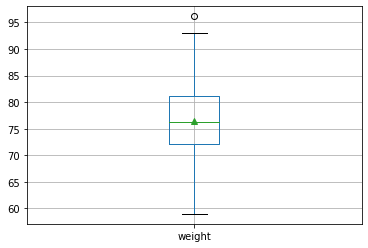

In [21]:
boxplot(df, 'weight')

In [22]:
print(stats.skew(df['weight']))
# Pelo boxplot, percebemos que a mediana (linha verde) e a média (triangulo verde) estão muito próximas, o que é um indício de simetria
# A obliquidade é pouco maior que 0. Assim podemos considerar que a distribuição é aproximadamente simétrica

0.030147052872865367


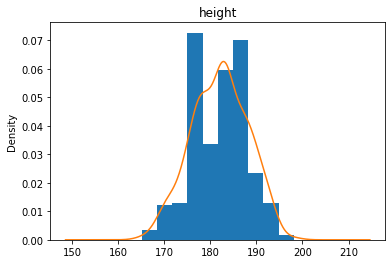

In [23]:
hist(df, 'height')

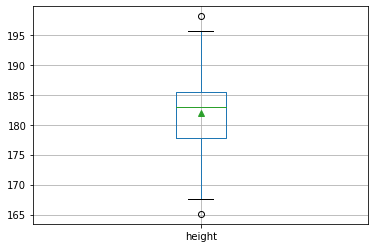

In [24]:
boxplot(df, 'height')

In [25]:
print(stats.skew(df['height']))
# Pelo boxplot, percebemos que a mediana (linha verde) está acima da média (triangulo verde), o que é um indício de não-simetria
# A obliquidade é negativa porém é um valor baixo. Assim podemos considerar que a distribuição possui leve cauda esquerda ou que é aproximadamente simétrica

-0.1195645747184587


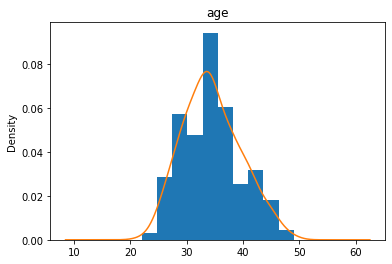

In [26]:
hist(df, 'age')

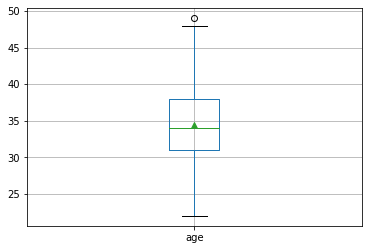

In [27]:
boxplot(df, 'age')

In [28]:
print(stats.skew(df['age']))
# Pelo boxplot, percebemos que a mediana (linha verde) está acima da média (triangulo verde), o que é um indício de não-simetria
# A obliquidade é positiva porém também num valor baixo.
# Assim podemos considerar que a distribuição possui leve cauda direita em relação à media ou que é aproximadamente simétrica.

0.30768196943036513
